PHASE 1 PROJECT
AVIATION ACCIDENTS DATA CSV

introduction
The aviation industry is one of the most sensitive when it comes to safety.  
This project analyzes aviation accident data to identify trends, risk factors,  
and provide recommendations for safer investments in aircraft and operators. 




overview
i will be working on skyway Airlines which is new to the aviation industry.which  i will use data from the past accidents between 1919 and 2023 to get potential risk of aircrafts and find the lowest aircraft risk.

objectives
1.Prepare and clean the aviation accident data in order to make it reliable.
2.See how the number of accidents and deaths changes over the years (year and decade).
3.Determine the high risk aircraft types, operators, and geographic hotspots.
4.Measure the severity of accidents and generate easy safety measures.
5.Determine the safest aircraft with less fatalities


In [27]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as pit
import seaborn as sns


In [28]:
#loading the dataset
df = pd.read_csv(r"C:\Users\Administrator\Moringa projects\pandas\flight\archive (1)\aviation-accident-data-2023-05-16.csv")
df

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [29]:
# checking the info of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [30]:
assert type(df)==pd.DataFrame

In [31]:
#checking of missing values
df.isnull().sum()

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

In [32]:

print('Missing values per column')
print(df.isnull().sum())

Missing values per column
date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64


In [33]:
#Removing duplicate rows
df = df.drop_duplicates()
df

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [34]:
#Removing rows with unknown values
df = df[~df.apply(lambda row: row.astype(str).str.lower().eq('unknown').any(), axis=1)]
df

,date,type,registration,operator,fatalities,location,country,cat,year
61,02-AUG-1919,Caproni Ca.48,NaN,Caproni,14,Verona,Italy,A1,1919
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [35]:
#checking data types
df.dtypes

date            object
type            object
registration    object
operator        object
fatalities      object
location        object
country         object
cat             object
year            object
dtype: object

In [36]:
#checking the data info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23274 entries, 61 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23274 non-null  object
 1   type          23274 non-null  object
 2   registration  21930 non-null  object
 3   operator      23270 non-null  object
 4   fatalities    19779 non-null  object
 5   location      22384 non-null  object
 6   country       23274 non-null  object
 7   cat           23274 non-null  object
 8   year          23274 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


In [37]:
#removing NAN values
df = df.dropna()
df

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [38]:
#dropping duplicates
df = df.drop_duplicates()
df

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [39]:
#checking the data info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18492 entries, 62 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          18492 non-null  object
 1   type          18492 non-null  object
 2   registration  18492 non-null  object
 3   operator      18492 non-null  object
 4   fatalities    18492 non-null  object
 5   location      18492 non-null  object
 6   country       18492 non-null  object
 7   cat           18492 non-null  object
 8   year          18492 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB


In [40]:
# removing rows with unkown year
# remove rows where 'year' is 'unknown' or NaN
df = df[df['year'] != 'unknown']
df

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [41]:
# converting year to integer
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [42]:
# changing Number of fatalities from string to integer

df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')

# Replace NaN with 0 and cast to int
df['fatalities'] = df['fatalities'].fillna(0).astype(int)

# Check result
print(df[['fatalities']].head(20))


    fatalities
62           1
63           0
64           0
65           0
66           4
68           0
70           2
71           0
72           0
74           0
76           5
78           6
79           0
80           0
81           0
82           1
86           0
87           0
88           3
89           0


DATA VISUALIZATION

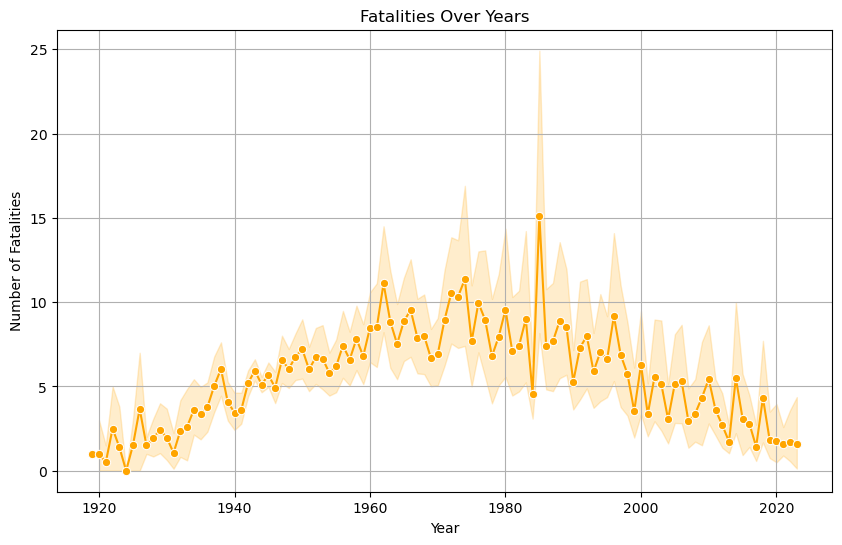

In [43]:
# plotting a line graph to show fatalities over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='fatalities', marker='o', color="Orange")
plt.title('Fatalities Over Years')    
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()


# description
a line graph showing fatalities over the year.
shows the years with the highest fatalitiez

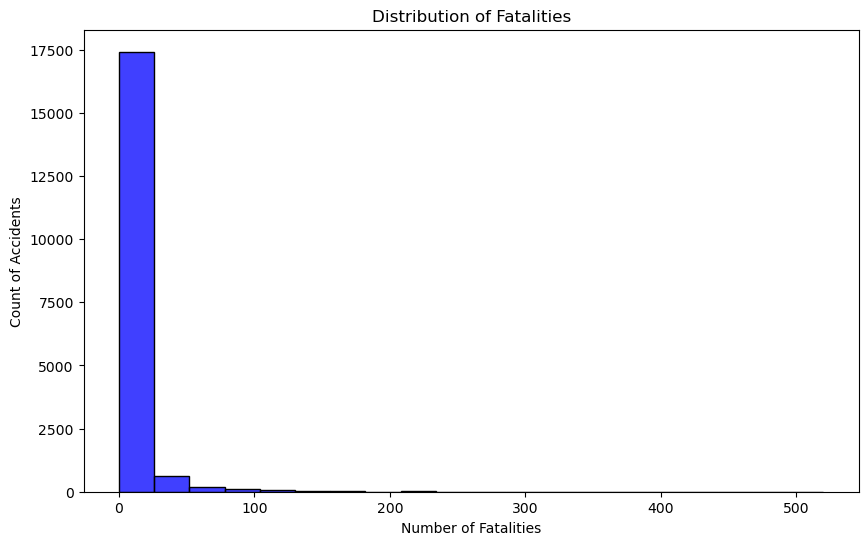

In [44]:
#plotting a histogram of fatalities 
Top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.histplot(df['fatalities'], bins=20, kde=False, color='blue')
plt.title('Distribution of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Count of Accidents')
plt.show()

# description
 A histogram showing the highest and lowest rate od fatalities

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19432\1956363294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


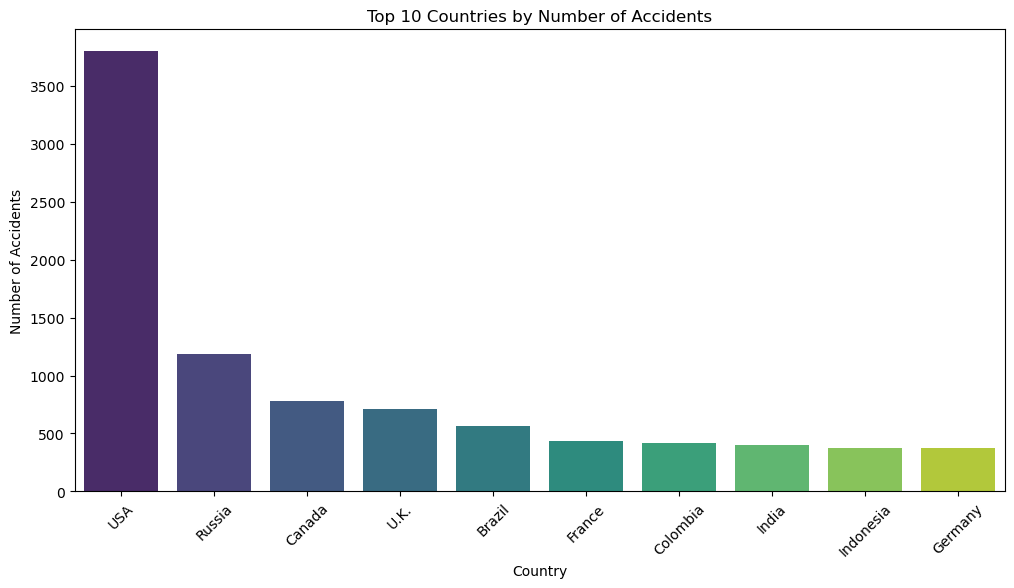

In [45]:
#bar chart for accidents per country for top 10 countries
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Number of Accidents')
plt.xlabel('Country')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# description
 A bar chart showing accident per country..which i used 10 countries
which shows that USA has the highest the number of Accidents.
 

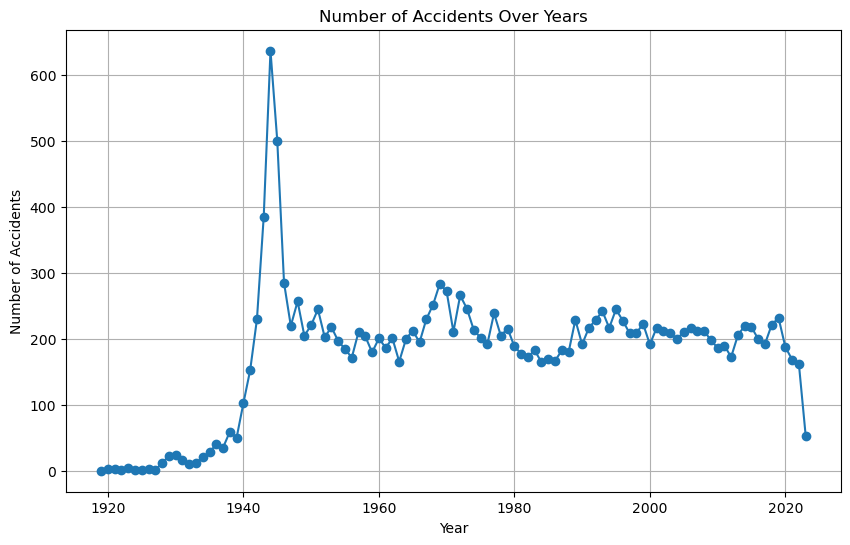

In [46]:
#line chart for accidents over years
Accidents_per_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(Accidents_per_year.index, Accidents_per_year.values, marker='o')
plt.title('Number of Accidents Over Years') 
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# description
a line chart for accident over the year

which shows the year 1940 to 1950 had the highest number of accidents.

In [47]:
#checking the data info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18492 entries, 62 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          18492 non-null  object
 1   type          18492 non-null  object
 2   registration  18492 non-null  object
 3   operator      18492 non-null  object
 4   fatalities    18492 non-null  int64 
 5   location      18492 non-null  object
 6   country       18492 non-null  object
 7   cat           18492 non-null  object
 8   year          18492 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [48]:
#checking for missing values again
df = df.isnull().sum()
df

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [49]:
#saving the cleaned data to a new csv file
df.to_csv('cleaned_aviation_data.csv', index=False)

DATA ANALYSIS

objective 1 and 2
To get the potential risks of aircrafts and lowest risk aircraft

factors are A=Accident,I=Incident,H=Hijacking,C=Criminal Occurence,O=Other Occurence,U=Unknown Occurence

category A1 has the highest rate of fatalities which is followed by C1 which is the criminal occurence

In [50]:
#pivot table to show total fatalities per  category
cat_avg_fatalities = df.groupby('cat')['fatalities'].sum().sort_values(ascending=False)
print(cat_avg_fatalities)

KeyError: 'cat'

objective 3 

i want to find out the most severe accident per category.

In [ ]:
#measure the severity of accidents per category
df_cat_severity = df.groupby('cat')['fatalities'].sum().sort_values(ascending=False)
df_cat_severity


cat
A1    107462
C1      8025
H1       746
A2       131
H2        96
C2        49
O1        11
O2         2
I1         0
I2         0
U1         0
Name: fatalities, dtype: int64

In [ ]:
#determine the safest aircraft type based on fatalities
safest_aircraft = df.groupby('type')['fatalities'].sum().sort_values()
safest_aircraft.head(20)

type
Airbus A300B4-103               0
Yakovlev Yak-40KD               0
lyushin Il-76TD                 0
unknown                         0
Vickers Valetta T.4             0
Vickers Varisty T.1             0
Vickers Viking C.2              0
Vickers Viscount                0
Xian Yunshuji Y-7-100C          0
Airbus A300B4-605R              0
Consolidated 28-5MC Canso A     0
Consolidated 28-5ME Catalina    0
Cessna 560 Citation Encore+     0
Cessna 560 Citation Ultra       0
Cessna 560XL Citation Excel     0
Cessna 560XL Citation XLS       0
Gulfstream G450                 0
Gulfstream G550                 0
Airbus A319-114                 0
Airbus A319-115 (WL)            0
Name: fatalities, dtype: int64

objective 4 
i want to know the safest aircraft with less fatalities

In [ ]:
# determine the safest aircraft with less fatalities
print("The safest aircraft type based on fatalities is the one with the least number of total fatalities.")
print(safest_aircraft.head(1))


The safest aircraft type based on fatalities is the one with the least number of total fatalities.
type
Airbus A300B4-103    0
Name: fatalities, dtype: int64
